<a href="https://colab.research.google.com/github/luckycontrol/DeepLearning_tensorflow/blob/main/11_ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ImageDataGenerator

Tensorflow에서 제공하는 이미지 데이터에 대한 여러가지 옵션들을 제공

## 이미지 변형 옵션들을 제공
  - 수집한 이미지 데이터가 많이 없을 때 사용
  - 이미지를 여러 방면으로 훈련시키기 위해서 사용



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
image = x_train[0]
image.shape

(28, 28, 1)

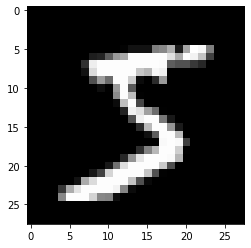

In [ ]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

# Augmentation
원래 존재하던 이미지에 추가적인 정보를 넣어주는 것.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_gen = ImageDataGenerator(
    rotation_range = 20,  # 최대 20도 각도로 이미지가 회전
    width_shift_range= 0.2,  # 좌우로 최대 20% 만큼 이미지가 움직임
    height_shift_range = 0.2,  # 상하로 최대 20%만큼 이미지가 움직임
    horizontal_flip = True,  # 좌우반전
    vertical_flip = True, # 상하반전
)

In [ ]:
inputs_demo = image[tf.newaxis, ...]
inputs_demo.shape

(1, 28, 28, 1)

In [ ]:
# flow 함수는 데이터의 배치를 만드는 기능이 있다.

demo_ds = data_gen.flow(inputs_demo)
gen_image = next(iter(demo_ds))

In [ ]:
gen_image.shape

(1, 28, 28, 1)

비교를 위해 시각화하기

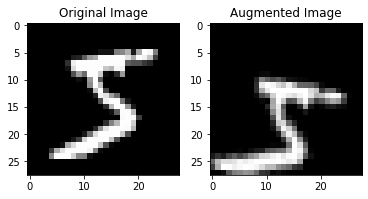

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(inputs_demo), 'gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(np.squeeze(gen_image), 'gray')

plt.show()

# ImageDataGenerator 변형 옵션

  - width_shift_range : 좌우 이동 범위 지정
  - height_shift_range : 상하 이동 범위 지정
  - brightness_range : 밝기 조절
  - zoom_range : 확대
  - horizontal_flip : 좌우반전 여부 ( True / False )
  - vertical_flip : 상하반전 여부 ( True / False )
  - rescale : 데이터 크기조정

In [ ]:
# train 데이터에 rescale이 사용되었으면, test_data generator에도 rescale이 들어가야한다.

train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    # rescale=1./255.
)

# test_datagen = ImageDataGenerator(
#     rescale=1./255.
# )